# **DFCAN**

---



<font size = 4>Deep Fourier channel attention network (DFCAN) is a network created to transform low-resolution (LR) images to super-resolved (SR) images, published by [Qiao, Chang and Li, Di and Guo, Yuting and Liu, Chong and Jiang, Tao and Dai, Qionghai and Li, Dong](https://www.nature.com/articles/s41592-020-01048-5). The training is done using LR-SR image pairs, taking the LR images as input and obtaining an output as close to SR as posible.

<figure>
<center>
<img src="https://drive.google.com/uc?id=1JSFWvpPFYXxfsIX7gmI7BLmKSWqAtypi" width="450">
</figure>


<font size = 4>*Disclaimer*:

<font size = 4>This notebook is inspired from the *Zero-Cost Deep-Learning to Enhance Microscopy* project (ZeroCostDL4Mic) (https://github.com/HenriquesLab/DeepLearning_Collab/wiki) and was created by jointly developed by [Ainhoa Serrano 
](https://github.com/sgainhoa), [Ignacio Arganda-Carreras](https://sites.google.com/site/iargandacarreras/) and [Roberto Santana Hermida.](http://www.sc.ehu.es/ccwbayes/members/rsantana/)

<font size = 4>This notebook is based on the following paper: 

<font size = 4>**Evaluation and development of deep neural networks for image super-resolution in optical microscopy**, by Chang Qiao, Di Li, Yuting Guo, Chong Liu, Tao Jiang, Qionghai Dai & Dong Li et al. in Nature Methods 2021, [https://www.nature.com/articles/s41592-020-01048-5](https://www.nature.com/articles/s41592-020-01048-5)

<font size = 4>**The source code of this notebook can be found in: [Github](https://github.com/qc17-THU/DL-SR)**

<font size = 4>**Please also cite this original paper when using or developing this notebook.**

# **How to use this notebook?**

---

<font size = 4>Video describing how to use ZeroCostDL4Mic notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---

<font size = 4>**We strongly recommend that you generate extra paired images. These images can be used to assess the quality of your trained model (Quality control dataset)**. The quality control assessment can be done directly in this notebook.

<font size = 4> **Additionally, the corresponding input and output files need to have the same name**.

<font size = 4> Please note that you currently can **only use .tif files!**


<font size = 4>Here's a common data structure that can work:
*   Experiment A
    - **Training dataset**
      - Low resolution (LR) images (Training_source)
        - img_1.tif, img_2.tif, ...
      - High resolution (HR) images (Training_target)
        - img_1.tif, img_2.tif, ...
    - **Quality control dataset**
     - Low resolution (LR) images
        - img_1.tif, img_2.tif
      - High resolution (HR) images
        - img_1.tif, img_2.tif
    - **Data to be predicted**
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Initialise the Colab session**
---







## **1.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [1]:
#@markdown ##Run this cell to check if you have GPU access
%tensorflow_version 2.x

import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime settings are correct then Google did not allocate GPU to your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')

from tensorflow.python.client import device_lib 
device_lib.list_local_devices()


You have GPU access


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6476003560446567217, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14336043032131391084
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

## **1.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Run this cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

#mounts user's Google Drive to Google Colab.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **2. Install DFCAN and dependencies**
---


In [2]:
#@markdown ##Install Network and dependencies

#Libraries contains information of certain topics. 

Notebook_version = ['1.12'] #Contact the ZeroCostDL4Mic team to find out about the version number

!pip install fpdf
# Place all imports below this code snippet
import sys
before = [str(m) for m in sys.modules]

from skimage.util import img_as_ubyte
from skimage import io
from skimage import filters
from skimage import transform

from matplotlib import pyplot as plt

from tensorflow.keras.layers import Conv2D, Conv3D
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input, add, multiply, Lambda

#For data augmentation
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


#image metrics
from skimage import metrics

# General import
from __future__ import print_function
import numpy as np
import pandas as pd
import os
import glob
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from pathlib import Path
import shutil
import random
import time
import csv
from math import ceil, floor
from fpdf import FPDF, HTMLMixin
from pip._internal.operations.freeze import freeze
import subprocess
# Imports for QC
from PIL import Image
from scipy import signal
from scipy import ndimage
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from tensorflow.image import ssim_multiscale as mssim

# For sliders and dropdown menu and progress bar
from ipywidgets import interact
import ipywidgets as widgets
# from tqdm import tqdm
from tqdm.notebook import tqdm

from sklearn.feature_extraction import image
from skimage.util.shape import view_as_windows

# Suppressing some warnings
import warnings
warnings.filterwarnings('ignore')

# -------------- Other definitions -----------
W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red

#Functions

def set_seed(seedValue=42):
  """Sets the seed on multiple python modules to obtain results as
  reproducible as possible.
  Args:
  seedValue (int, optional): seed value.
  """
  np.random.seed(seed=seedValue)
  tf.random.set_seed(seedValue)
  os.environ["PYTHONHASHSEED"]=str(seedValue)
set_seed()


#----------------Create patches by size -------------------
def create_patches_by_size( imgs , size, num_x_patches, num_y_patches):
    ''' Create a list of images patches out of a list of images
    Args:
        imgs: list of input images
        size: size of the output patches (size x size)
        num_x_patches: number of patches in the X axis
        num_y_patches: number of patches in the Y axis
        
    Returns:
        list of image patches
    '''

    original_size = imgs[0].shape
    x_num = original_size[ 0 ] // size
    y_num = original_size[ 1 ] // size

    if x_num > num_x_patches:
      x_num = num_x_patches
    if y_num > num_y_patches:
      y_num = num_y_patches
    
    patches = []
    for n in range( 0, len( imgs ) ):
        image = imgs[ n ]
        for i in range( 0, x_num ):
            for j in range( 0, y_num ):
                patches.append( image[ i * size : (i+1) * size,
                                      j * size : (j+1) * size ] )
    return patches



# We define a method to create an arbitrary number of random crops of
# a given size
def create_random_patches( lr_path, hr_path, file_names, scale, num_patches,
                          lr_shape ):
    ''' Create a list of images patches out of a list of images
    Args:
        lr_path (string): low resolution (LR) image path (input images).
        hr_path (string): high resolution (HR) image path (ground truth images).
        file_names (list): image file names (same for LR and HR images).
        scale (int): scale factor between LR and HR images. Example: 2.
        num_patches (int): number of patches for each image.
        lr_shape (2D array): size of the LR patches. Example: [128, 128].
        
    Returns:
        list of image patches (LR) and patches of corresponding labels (HR)
    '''

    # read training images
    lr_img = img_as_ubyte( io.imread( lr_path + '/' + file_names[0] ) )

    original_size = lr_img.shape
    
    input_patches = []
    output_patches = []
    for n in range( 0, len( file_names ) ):
        lr_img = img_as_ubyte( io.imread( lr_path + '/' + file_names[n] ) )
        hr_img = img_as_ubyte( io.imread( hr_path + '/' + file_names[n] ) )
        for i in range( num_patches ):
          r = np.random.randint(0,original_size[0]-lr_shape[0])
          c = np.random.randint(0,original_size[1]-lr_shape[1])
          input_patches.append(  lr_img[ r : r + lr_shape[0],
                                  c : c + lr_shape[1] ] )
          output_patches.append( hr_img[ r*scale : (r + lr_shape[0])*scale,
                                  c*scale : (c + lr_shape[1])*scale ] )
    return input_patches, output_patches


## DFCAN network definition. We follow the code from:
### [Chang Qiao](https://github.com/qc17-THU/DL-SR/tree/main/src) (MIT license).
#### Common methods for both DFCAN and DFGAN adapted from `common.py`:


def gelu(x):
    cdf = 0.5 * (1.0 + tf.math.erf(x / tf.sqrt(2.0)))
    return x * cdf


def fft2d(input, gamma=0.1):
    temp = K.permute_dimensions(input, (0, 3, 1, 2))
    fft = tf.signal.fft2d(tf.complex(temp, tf.zeros_like(temp)))
    absfft = tf.math.pow(tf.math.abs(fft)+1e-8, gamma)
    output = K.permute_dimensions(absfft, (0, 2, 3, 1))
    return output


def fft3d(input, gamma=0.1):
    input = apodize3d(input, napodize=5)
    temp = K.permute_dimensions(input, (0, 4, 1, 2, 3))
    fft = tf.fft3d(tf.complex(temp, tf.zeros_like(temp)))
    absfft = tf.math.pow(tf.math.abs(fft) + 1e-8, gamma)
    output = K.permute_dimensions(absfft, (0, 2, 3, 4, 1))
    return output


def fftshift2d(input, size_psc):
    bs, h, w, ch = input.get_shape().as_list()
    fs11 = input[:, -h // 2:h, -w // 2:w, :]
    fs12 = input[:, -h // 2:h, 0:w // 2, :]
    fs21 = input[:, 0:h // 2, -w // 2:w, :]
    fs22 = input[:, 0:h // 2, 0:w // 2, :]
    output = tf.concat([tf.concat([fs11, fs21], axis=1), tf.concat([fs12, fs22], axis=1)], axis=2)
    output = tf.image.resize(output, (size_psc, size_psc))
    return output


def fftshift3d(input, size_psc=64):
    bs, h, w, z, ch = input.get_shape().as_list()
    fs111 = input[:, -h // 2:h, -w // 2:w, -z // 2 + 1:z, :]
    fs121 = input[:, -h // 2:h, 0:w // 2, -z // 2 + 1:z, :]
    fs211 = input[:, 0:h // 2, -w // 2:w, -z // 2 + 1:z, :]
    fs221 = input[:, 0:h // 2, 0:w // 2, -z // 2 + 1:z, :]
    fs112 = input[:, -h // 2:h, -w // 2:w, 0:z // 2 + 1, :]
    fs122 = input[:, -h // 2:h, 0:w // 2, 0:z // 2 + 1, :]
    fs212 = input[:, 0:h // 2, -w // 2:w, 0:z // 2 + 1, :]
    fs222 = input[:, 0:h // 2, 0:w // 2, 0:z // 2 + 1, :]
    output1 = tf.concat([tf.concat([fs111, fs211], axis=1), tf.concat([fs121, fs221], axis=1)], axis=2)
    output2 = tf.concat([tf.concat([fs112, fs212], axis=1), tf.concat([fs122, fs222], axis=1)], axis=2)
    output0 = tf.concat([output1, output2], axis=3)
    output = []
    for iz in range(z):
        output.append(tf.image.resize(output0[:, :, :, iz, :], (size_psc, size_psc)))
    output = tf.stack(output, axis=3)
    return output


def apodize2d(img, napodize=10):
    bs, ny, nx, ch = img.get_shape().as_list()
    img_apo = img[:, napodize:ny-napodize, :, :]

    imageUp = img[:, 0:napodize, :, :]
    imageDown = img[:, ny-napodize:, :, :]
    diff = (imageDown[:, -1::-1, :, :] - imageUp) / 2
    l = np.arange(napodize)
    fact_raw = 1 - np.sin((l + 0.5) / napodize * np.pi / 2)
    fact = fact_raw[np.newaxis, :, np.newaxis, np.newaxis]
    fact = tf.convert_to_tensor(fact, dtype=tf.float32)
    fact = tf.tile(fact, [tf.shape(img)[0], 1, nx, ch])
    factor = diff * fact
    imageUp = tf.add(imageUp, factor)
    imageDown = tf.subtract(imageDown, factor[:, -1::-1, :, :])
    img_apo = tf.concat([imageUp, img_apo, imageDown], axis=1)

    imageLeft = img_apo[:, :, 0:napodize, :]
    imageRight = img_apo[:, :, nx-napodize:, :]
    img_apo = img_apo[:, :, napodize:nx-napodize, :]
    diff = (imageRight[:, :, -1::-1, :] - imageLeft) / 2
    fact = fact_raw[np.newaxis, np.newaxis, :, np.newaxis]
    fact = tf.convert_to_tensor(fact, dtype=tf.float32)
    fact = tf.tile(fact, [tf.shape(img)[0], ny, 1, ch])
    factor = diff * fact
    imageLeft = tf.add(imageLeft, factor)
    imageRight = tf.subtract(imageRight, factor[:, :, -1::-1, :])
    img_apo = tf.concat([imageLeft, img_apo, imageRight], axis=2)

    return img_apo


def apodize3d(img, napodize=5):
    bs, ny, nx, nz, ch = img.get_shape().as_list()
    img_apo = img[:, napodize:ny-napodize, :, :, :]

    imageUp = img[:, 0:napodize, :, :, :]
    imageDown = img[:, ny-napodize:, :, :, :]
    diff = (imageDown[:, -1::-1, :, :, :] - imageUp) / 2
    l = np.arange(napodize)
    fact_raw = 1 - np.sin((l + 0.5) / napodize * np.pi / 2)
    fact = fact_raw[np.newaxis, :, np.newaxis, np.newaxis, np.newaxis]
    fact = tf.convert_to_tensor(fact, dtype=tf.float32)
    fact = tf.tile(fact, [tf.shape(img)[0], 1, nx, nz, ch])
    factor = diff * fact
    imageUp = tf.add(imageUp, factor)
    imageDown = tf.subtract(imageDown, factor[:, -1::-1, :, :, :])
    img_apo = tf.concat([imageUp, img_apo, imageDown], axis=1)

    imageLeft = img_apo[:, :, 0:napodize, :, :]
    imageRight = img_apo[:, :, nx-napodize:, :, :]
    img_apo = img_apo[:, :, napodize:nx-napodize, :, :]
    diff = (imageRight[:, :, -1::-1, :, :] - imageLeft) / 2
    fact = fact_raw[np.newaxis, np.newaxis, :, np.newaxis, np.newaxis]
    fact = tf.convert_to_tensor(fact, dtype=tf.float32)
    fact = tf.tile(fact, [tf.shape(img)[0], ny, 1, nz, ch])
    factor = diff * fact
    imageLeft = tf.add(imageLeft, factor)
    imageRight = tf.subtract(imageRight, factor[:, :, -1::-1, :, :])
    img_apo = tf.concat([imageLeft, img_apo, imageRight], axis=2)

    return img_apo


def pixel_shiffle(layer_in, scale):
    return tf.nn.depth_to_space(layer_in, block_size=scale)


def global_average_pooling2d(layer_in):
    return tf.reduce_mean(layer_in, axis=(1, 2), keepdims=True)


def global_average_pooling3d(layer_in):
    return tf.reduce_mean(layer_in, axis=(1, 2, 3), keepdims=True)


def conv_block2d(input, channel_size):
    conv = Conv2D(channel_size[0], kernel_size=3, padding='same')(input)
    conv = LeakyReLU(alpha=0.1)(conv)
    conv = Conv2D(channel_size[1], kernel_size=3, padding='same')(conv)
    conv = LeakyReLU(alpha=0.1)(conv)
    return conv


def conv_block3d(input, channel_size):
    conv = Conv3D(channel_size[0], kernel_size=3, padding='same')(input)
    conv = LeakyReLU(alpha=0.1)(conv)
    conv = Conv3D(channel_size[1], kernel_size=3, padding='same')(conv)
    conv = LeakyReLU(alpha=0.1)(conv)
    return conv


## DFCAN specific methods:

def FCALayer(input, channel, size_psc, reduction=16):
    absfft1 = Lambda(fft2d, arguments={'gamma': 0.8})(input)
    absfft1 = Lambda(fftshift2d, arguments={'size_psc': size_psc})(absfft1)
    absfft2 = Conv2D(channel, kernel_size=3, activation='relu', padding='same')(absfft1)
    W = Lambda(global_average_pooling2d)(absfft2)
    W = Conv2D(channel // reduction, kernel_size=1, activation='relu', padding='same')(W)
    W = Conv2D(channel, kernel_size=1, activation='sigmoid', padding='same')(W)
    mul = multiply([input, W])
    return mul


def FCAB(input, channel, size_psc):
    conv = Conv2D(channel, kernel_size=3, padding='same')(input)
    conv = Lambda(gelu)(conv)
    conv = Conv2D(channel, kernel_size=3, padding='same')(conv)
    conv = Lambda(gelu)(conv)
    att = FCALayer(conv, channel, size_psc=size_psc, reduction=16)
    output = add([att, input])
    return output


def ResidualGroup(input, channel, size_psc, n_RCAB = 4):
    conv = input
    for _ in range(n_RCAB):
        conv = FCAB(conv, channel=channel, size_psc=size_psc)
    conv = add([conv, input])
    return conv


def DFCAN(input_shape, scale=4, n_ResGroup = 4, n_RCAB = 4, pretrained_weights=None):
    inputs = Input(input_shape)
    size_psc = input_shape[0]
    conv = Conv2D(64, kernel_size=3, padding='same')(inputs)
    conv = Lambda(gelu)(conv)
    for _ in range(n_ResGroup):
        conv = ResidualGroup(conv, 64, size_psc, n_RCAB = 4)
    conv = Conv2D(64 * (scale ** 2), kernel_size=3, padding='same')(conv)
    conv = Lambda(gelu)(conv)
    upsampled = Lambda(pixel_shiffle, arguments={'scale': scale})(conv)
    conv = Conv2D(1, kernel_size=3, padding='same')(upsampled)
    output = Activation('sigmoid')(conv)
    model = Model(inputs=inputs, outputs=output)
    return model



## One-cycle policy for super-convergence
### We implement the learning rate on a one-cycle policy as per Leslie Smith's paper 
### (https://arxiv.org/pdf/1803.09820.pdf) for fast convergence.

class CosineAnnealer:
    
    def __init__(self, start, end, steps):
        self.start = start
        self.end = end
        self.steps = steps
        self.n = 0
        
    def step(self):
        self.n += 1
        cos = np.cos(np.pi * (self.n / self.steps)) + 1
        return self.end + (self.start - self.end) / 2. * cos


class OneCycleScheduler(Callback):
    """ `Callback` that schedules the learning rate on a 1cycle policy as per Leslie Smith's paper(https://arxiv.org/pdf/1803.09820.pdf).
    If the model supports a momentum parameter, it will also be adapted by the schedule.
    The implementation adopts additional improvements as per the fastai library: https://docs.fast.ai/callbacks.one_cycle.html, where
    only two phases are used and the adaptation is done using cosine annealing.
    In phase 1 the LR increases from `lr_max / div_factor` to `lr_max` and momentum decreases from `mom_max` to `mom_min`.
    In the second phase the LR decreases from `lr_max` to `lr_max / (div_factor * 1e4)` and momemtum from `mom_max` to `mom_min`.
    By default the phases are not of equal length, with the phase 1 percentage controlled by the parameter `phase_1_pct`.
    """

    def __init__(self, lr_max, steps, mom_min=0.85, mom_max=0.95, phase_1_pct=0.3, div_factor=25.):
        super(OneCycleScheduler, self).__init__()
        lr_min = lr_max / div_factor
        final_lr = lr_max / (div_factor * 1e4)
        phase_1_steps = steps * phase_1_pct
        phase_2_steps = steps - phase_1_steps
        
        self.phase_1_steps = phase_1_steps
        self.phase_2_steps = phase_2_steps
        self.phase = 0
        self.step = 0
        
        self.phases = [[CosineAnnealer(lr_min, lr_max, phase_1_steps), CosineAnnealer(mom_max, mom_min, phase_1_steps)], 
                 [CosineAnnealer(lr_max, final_lr, phase_2_steps), CosineAnnealer(mom_min, mom_max, phase_2_steps)]]
        
        self.lrs = []
        self.moms = []

    def on_train_begin(self, logs=None):
        self.phase = 0
        self.step = 0

        self.set_lr(self.lr_schedule().start)
        self.set_momentum(self.mom_schedule().start)
        
    def on_train_batch_begin(self, batch, logs=None):
        self.lrs.append(self.get_lr())
        self.moms.append(self.get_momentum())

    def on_train_batch_end(self, batch, logs=None):
        self.step += 1
        if self.step >= self.phase_1_steps:
            self.phase = 1
            
        self.set_lr(self.lr_schedule().step())
        self.set_momentum(self.mom_schedule().step())
        
    def get_lr(self):
        try:
            return tf.keras.backend.get_value(self.model.optimizer.lr)
        except AttributeError:
            return None
        
    def get_momentum(self):
        try:
            return tf.keras.backend.get_value(self.model.optimizer.momentum)
        except AttributeError:
            return None
        
    def set_lr(self, lr):
        try:
            tf.keras.backend.set_value(self.model.optimizer.lr, lr)
        except AttributeError:
            pass # ignore
        
    def set_momentum(self, mom):
        try:
            tf.keras.backend.set_value(self.model.optimizer.momentum, mom)
        except AttributeError:
            pass # ignore

    def lr_schedule(self):
        return self.phases[self.phase][0]
    
    def mom_schedule(self):
        return self.phases[self.phase][1]
    
    def plot(self):
        ax = plt.subplot(1, 2, 1)
        ax.plot(self.lrs)
        ax.set_title('Learning Rate')
        ax = plt.subplot(1, 2, 2)
        ax.plot(self.moms)
        ax.set_title('Momentum')


## Loss function definition used in the paper from nature methods
def loss_dfcan(y_true, y_pred):
  mse = tf.keras.losses.MeanSquaredError()
  ssim = tf.image.ssim_multiscale(y_true, y_pred, max_val=1)
  res = mse(y_true, y_pred) + 0.1*(1-ssim)
  return res


# Random rotation of an image by a multiple of 90 degrees
def random_90rotation( img ):
    return transform.rotate(img, 90*np.random.randint( 0, 5 ), preserve_range=True)

# Runtime data augmentation
def get_train_val_generators(X_data, Y_data, validation_split=0.25,
                             batch_size=32, seed=42, show_examples=False, 
                             rotation=True, horizontal_flip=True, vertical_flip=True ):
    X_train, X_test, Y_train, Y_test = train_test_split(X_data,
                                                        Y_data,
                                                        train_size=1-validation_split,
                                                        test_size=validation_split,
                                                        random_state=seed, shuffle=False)
    

    random_rotation=random_90rotation
    if not rotation:
      random_rotation=None

    # Image data generator distortion options
    data_gen_args = dict( preprocessing_function=random_rotation,
                          horizontal_flip=True,
                          vertical_flip=True,
                          fill_mode='reflect')


    # Train data, provide the same seed and keyword arguments to the fit and flow methods
    X_datagen = ImageDataGenerator(**data_gen_args)
    Y_datagen = ImageDataGenerator(**data_gen_args)
    X_datagen.fit(X_train, augment=True, seed=seed)
    Y_datagen.fit(Y_train, augment=True, seed=seed)
    X_train_augmented = X_datagen.flow(X_train, batch_size=batch_size, shuffle=True, seed=seed)
    Y_train_augmented = Y_datagen.flow(Y_train, batch_size=batch_size, shuffle=True, seed=seed)
     
    
    # Validation data, no data augmentation, but we create a generator anyway
    X_datagen_val = ImageDataGenerator()
    Y_datagen_val = ImageDataGenerator()
    X_datagen_val.fit(X_test, augment=True, seed=seed)
    Y_datagen_val.fit(Y_test, augment=True, seed=seed)
    X_test_augmented = X_datagen_val.flow(X_test, batch_size=batch_size, shuffle=False, seed=seed)
    Y_test_augmented = Y_datagen_val.flow(Y_test, batch_size=batch_size, shuffle=False, seed=seed)
    
    if show_examples:
        plt.figure(figsize=(10,10))
        # generate samples and plot
        for i in range(3):
            # define subplot
            plt.subplot(321 + 2*i)
            # generate batch of images
            batch = X_train_augmented.next()
            # convert to unsigned integers for viewing
            image = batch[0]
            # plot raw pixel data
            plt.imshow(image[:,:,0], vmin=0, vmax=1, cmap='gray')
            plt.subplot(321 + 2*i+1)
            # generate batch of images
            batch = Y_train_augmented.next()
            # convert to unsigned integers for viewing
            image = batch[0]
            # plot raw pixel data
            plt.imshow(image[:,:,0], vmin=0, vmax=1, cmap='gray')
        # show the figure
        plt.show()
        X_train_augmented.reset()
        Y_train_augmented.reset()
    
    # combine generators into one which yields image and masks
    train_generator = zip(X_train_augmented, Y_train_augmented)
    test_generator = zip(X_test_augmented, Y_test_augmented)
    
    return train_generator, test_generator





# Simple normalization to min/max fir the Mask
def normalizeMinMax(x, dtype=np.float32):
  x = x.astype(dtype,copy=False)
  x = (x - np.amin(x)) / (np.amax(x) - np.amin(x))
  return x
  
def getClassWeights(Training_target_path):

  Mask_dir_list = os.listdir(Training_target_path)
  number_of_dataset = len(Mask_dir_list)

  class_count = np.zeros(2, dtype=int)
  for i in tqdm(range(number_of_dataset)):
    mask = io.imread(os.path.join(Training_target_path, Mask_dir_list[i]))
    mask = normalizeMinMax(mask)
    class_count[0] += mask.shape[0]*mask.shape[1] - mask.sum()
    class_count[1] += mask.sum()

  n_samples = class_count.sum()
  n_classes = 2

  class_weights = n_samples / (n_classes * class_count)
  return class_weights

#############################################################################


# Below are templates for the function definitions for the export
# of pdf summaries for training and qc. You will need to adjust these functions
# with the variables and other parameters as necessary to make them
# work for your project
from datetime import datetime

def pdf_export(trained = False, augmentation = False, pretrained_model = False):
    # save FPDF() class into a  
    # variable pdf 
    #from datetime import datetime

    class MyFPDF(FPDF, HTMLMixin):
        pass

    pdf = MyFPDF()
    pdf.add_page()
    pdf.set_right_margin(-1)
    pdf.set_font("Arial", size = 11, style='B') 

    Network = "DFCAN"
    day = datetime.now()
    datetime_str = str(day)[0:10]

    Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
    pdf.multi_cell(180, 5, txt = Header, align = 'L') 

    # add another cell 
    if trained:
      training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
      pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
    pdf.ln(1)

    Header_2 = 'Information for your materials and methods:'
    pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

    all_packages = ''
    for requirement in freeze(local_only=True):
      all_packages = all_packages+requirement+', '
    #print(all_packages)

    #Main Packages
    main_packages = ''
    version_numbers = []
    for name in ['tensorflow','numpy','Keras','csbdeep']:
      find_name=all_packages.find(name)
      main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
      #Version numbers only here:
      version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

    cuda_version = subprocess.run('nvcc --version',stdout=subprocess.PIPE, shell=True)
    cuda_version = cuda_version.stdout.decode('utf-8')
    cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
    gpu_name = subprocess.run('nvidia-smi',stdout=subprocess.PIPE, shell=True)
    gpu_name = gpu_name.stdout.decode('utf-8')
    gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
    #print(cuda_version[cuda_version.find(', V')+3:-1])
    #print(gpu_name)

    shape = io.imread(Training_source+'/'+os.listdir(Training_source)[1]).shape
    dataset_size = len(os.listdir(Training_source))

    ##################-------CAMBIAR--------##################
    #text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(dataset_size*number_of_patches)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+config.train_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'
    text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(dataset_size*number_of_patches)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(source_patch_size)+','+str(source_patch_size)+')) with a batch size of '+str(batch_size)+' and a ssim_multiscale loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

    if pretrained_model:
      text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(dataset_size*number_of_patches)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(source_patch_size)+','+str(source_patch_size)+')) with a batch size of '+str(batch_size)+' using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was re-trained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

    pdf.set_font('')
    pdf.set_font_size(10.)
    pdf.multi_cell(190, 5, txt = text, align='L')
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.ln(1)
    pdf.cell(28, 5, txt='Augmentation: ', ln=0)
    pdf.set_font('')
    if augmentation:
      aug_text = 'The dataset was augmented by '
      if Rotation == True:
        aug_text = aug_text+'\n- rotation'
      if horizontal_flip == True or vertical_flip == True:
        aug_text = aug_text+'\n- flipping'
    else:
      aug_text = 'No augmentation was used for training.'
    pdf.multi_cell(190, 5, txt=aug_text, align='L')
    pdf.set_font('Arial', size = 11, style = 'B')
    pdf.ln(1)
    pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
    pdf.set_font('')
    pdf.set_font_size(10.)
    if Use_Default_Advanced_Parameters:
      pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
    pdf.cell(200, 5, txt='The following parameters were used for training:')
    pdf.ln(1)
    html = """ 
    <table width=40% style="margin-left:0px;">
      <tr>
        <th width = 50% align="left">Parameter</th>
        <th width = 50% align="left">Value</th>
      </tr>
      <tr>
        <td width = 50%>number_of_epochs</td>
        <td width = 50%>{0}</td>
      </tr>
      <tr>
        <td width = 50%>patch_size</td>
        <td width = 50%>{1}</td>
      </tr>
      <tr>
        <td width = 50%>number_of_patches</td>
        <td width = 50%>{2}</td>
      </tr>
      <tr>
        <td width = 50%>batch_size</td>
        <td width = 50%>{3}</td>
      </tr>
      <tr>
        <td width = 50%>number_of_steps</td>
        <td width = 50%>{4}</td>
      </tr>
      <tr>
        <td width = 50%>percentage_validation</td>
        <td width = 50%>{5}</td>
      </tr>
      <tr>
        <td width = 50%>initial_learning_rate</td>
        <td width = 50%>{6}</td>
      </tr>
    </table>
    """.format(number_of_epochs,str(source_patch_size)+'x'+str(source_patch_size),number_of_patches,batch_size,number_of_steps,percentage_validation,initial_learning_rate)
    pdf.write_html(html)

    #pdf.multi_cell(190, 5, txt = text_2, align='L')
    pdf.set_font("Arial", size = 11, style='B')
    pdf.ln(1)
    pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.cell(29, 5, txt= 'Training_source:', align = 'L', ln=0)
    pdf.set_font('')
    pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.cell(27, 5, txt= 'Training_target:', align = 'L', ln=0)
    pdf.set_font('')
    pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
    #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
    pdf.ln(1)
    pdf.set_font('')
    pdf.set_font('Arial', size = 10, style = 'B')
    pdf.cell(22, 5, txt= 'Model Path:', align = 'L', ln=0)
    pdf.set_font('')
    pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
    pdf.ln(1)
    pdf.cell(60, 5, txt = 'Example Training pair', ln=1)
    pdf.ln(1)
    exp_size = io.imread("/content/ExampleData.png").shape
    pdf.image("/content/ExampleData.png", x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
    pdf.ln(1)
    ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "ZeroCostDL4Mic: an open platform to simplify access and use of Deep-Learning in Microscopy." BioRxiv (2020).'
    pdf.multi_cell(190, 5, txt = ref_1, align='L')
    ref_2 = '- DFCAN: Chang Qao et al. "Evaluation and development of deep neural networks for image super-resolution in optical microscopy" Nature Methods, 2021'
    pdf.multi_cell(190, 5, txt = ref_2, align='L')
    pdf.ln(3)
    reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
    pdf.set_font('Arial', size = 11, style='B')
    pdf.multi_cell(190, 5, txt=reminder, align='C')

    pdf.output(model_path+'/'+model_name+'/'+model_name+"_training_report.pdf")


#Make a pdf summary of the QC results

def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  Network = "DFCAN"
  #model_name = os.path.basename(full_QC_model_path)
  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'Quality Control/QC_example_data.png').shape
  if os.path.exists(full_QC_model_path+'Quality Control/lossCurvePlots.png'):
    pdf.image(full_QC_model_path+'Quality Control/lossCurvePlots.png', x = 11, y = None, w = round(exp_size[1]/10), h = round(exp_size[0]/13))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    pdf.multi_cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.', align='L')
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'Quality Control/QC_example_data.png').shape
  pdf.image(full_QC_model_path+'Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/10), h = round(exp_size[0]/10))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  html = """
  <body>
  <font size="7" face="Courier New" >
  <table width=94% style="margin-left:0px;">"""
  with open(full_QC_model_path+'Quality Control/QC_metrics_'+QC_model_name+'.csv', 'r') as csvfile:
    metrics = csv.reader(csvfile)
    header = next(metrics)
    image = header[0]
    mSSIM_PvsGT = header[1]
    mSSIM_SvsGT = header[2]
    NRMSE_PvsGT = header[3]
    NRMSE_SvsGT = header[4]
    PSNR_PvsGT = header[5]
    PSNR_SvsGT = header[6]
    header = """
    <tr>
      <th width = 10% align="left">{0}</th>
      <th width = 15% align="left">{1}</th>
      <th width = 15% align="center">{2}</th>
      <th width = 15% align="left">{3}</th>
      <th width = 15% align="center">{4}</th>
      <th width = 15% align="left">{5}</th>
      <th width = 15% align="center">{6}</th>
    </tr>""".format(image,mSSIM_PvsGT,mSSIM_SvsGT,NRMSE_PvsGT,NRMSE_SvsGT,PSNR_PvsGT,PSNR_SvsGT)
    html = html+header
    for row in metrics:
      image = row[0]
      mSSIM_PvsGT = row[1]
      mSSIM_SvsGT = row[2]
      NRMSE_PvsGT = row[3]
      NRMSE_SvsGT = row[4]
      PSNR_PvsGT = row[5]
      PSNR_SvsGT = row[6]
      cells = """
        <tr>
          <td width = 10% align="left">{0}</td>
          <td width = 15% align="center">{1}</td>
          <td width = 15% align="center">{2}</td>
          <td width = 15% align="center">{3}</td>
          <td width = 15% align="center">{4}</td>
          <td width = 15% align="center">{5}</td>
          <td width = 15% align="center">{6}</td>
        </tr>""".format(image,str(round(float(mSSIM_PvsGT),3)),str(round(float(mSSIM_SvsGT),3)),str(round(float(NRMSE_PvsGT),3)),str(round(float(NRMSE_SvsGT),3)),str(round(float(PSNR_PvsGT),3)),str(round(float(PSNR_SvsGT),3)))
      html = html+cells
    html = html+"""</body></table>"""

  pdf.write_html(html)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "ZeroCostDL4Mic: an open platform to simplify access and use of Deep-Learning in Microscopy." BioRxiv (2020).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- DFCAN: Chang Qiao, Di Li, Yuting Guo, Chong Liu, Tao Jiang, Qionghai Dai & Dong Li et al. in Nature Methods 2021.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(full_QC_model_path+'Quality Control/'+QC_model_name+'_QC_report.pdf')

print("Depencies installed and imported.")

# Exporting requirements.txt for local run 
# -- the developers should leave this below all the other installations
!pip freeze > requirements.txt

# Code snippet to shorten requirements file to essential packages 
after = [str(m) for m in sys.modules]

# Ensure this code snippet is placed before all other imports!
#  import sys
#  before = [str(m) for m in sys.modules]

from builtins import any as b_any

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

df = pd.read_csv('requirements.txt', delimiter = "\n")
mod_list = [m.split('.')[0] for m in after if not m in before]
req_list_temp = df.values.tolist()
req_list = [x[0] for x in req_list_temp]

# If necessary, extend mod_name_list with packages where import name is different from package name for pip install
mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list] 
filtered_list = filter_files(req_list, mod_replace_list)

# Insert name of network below
file=open('DFCAN_requirements_simple.txt','w')
for item in filtered_list:
    file.writelines(item + '\n')

file.close()

  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=e368fad7c7528d329d32667d76f4c3f730f15d0e92be918221085e9e0d5912f2
  Stored in directory: /root/.cache/pip/wheels/9a/e9/77/4554ff5c99bc3f487c8d69620d8c41d99d54e9c54ab20ef4c9
Successfully built fpdf
Depencies installed and imported.


# **3. Select your paths and parameters**

---


## **3.1. Download the default dataset**
---

<font size = 4>If you don't have a dataset to try this model, you can download a default dataset with the following cell. This dataset was provided by [Qiao, Chang and Li, Di and Guo, Yuting and Liu, Chong and Jiang, Tao and Dai, Qionghai and Li, Dong](https://www.nature.com/articles/s41592-020-01048-5), the authors of the paper this notebook is based on. It was created by using multimodality structured illumination microscopy (SIM), resulting in an extensive dataset of LR–SR image pairs. However, the size of this dataset is smaller compared to the original one for simplicity.

In [14]:
#@markdown ##Download default dataset

# download f-actin data
!wget --show-progress -O F-actin.zip https://www.dropbox.com/s/9f9xat4jbgkdchh/F-actin-small.zip?dl=0
!unzip -q F-actin.zip
!rm F-actin.zip

--2021-05-30 15:53:44--  https://www.dropbox.com/s/9f9xat4jbgkdchh/F-actin-small.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9f9xat4jbgkdchh/F-actin-small.zip [following]
--2021-05-30 15:53:44--  https://www.dropbox.com/s/raw/9f9xat4jbgkdchh/F-actin-small.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc308f2a223d477cd6cef7730c4c.dl.dropboxusercontent.com/cd/0/inline/BPeTdCXwYKCMw4AoIbqKKW7QqTOvE2kATc9XsWtw8iidf0nr0ovKyl_YzFpdiOoesq9jha7SBVdneRJW3dnWcXRC8VE0VBQfMhRF9JzQvOr_wBjdLq4hOnYTvQHctZDC_l1GXztem_11pJdLaei463rL/file# [following]
--2021-05-30 15:53:45--  https://uc308f2a223d477cd6cef7730c4c.dl.dropboxusercontent.com/cd/0/inline/BPeTdCXwYKCMw4AoIbqKKW7QqTOvE2kATc9XsWtw8iidf0nr0ovKyl_YzFpdiOoesq9jh

## **3.2. Setting the main training parameters**
---

<font size = 4>The code below allows the user to enter the paths to where the training data is and to define the training parameters. Note that the execution of the cell will take some time as the images from the folders will be read into memory.

<font size = 5> **Paths for training, predictions and results**

<font size = 4>**`Training_source:`, `Training_target`:** These are the paths to your folders containing the Training_source and Training_target data respectively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).

<font size = 5> **Scaling factor**

<font size = 4>**`down_factor`:** Scaling factor by which every dimension of the original images is reduced. Typical values are 2, 4, etc. This is a **critical parameter** that depends on the acquisition of your LR and SR images. **Default value: 2**

<font size = 5>**Training parameters**

<font size = 4>**`number_of_epochs`:** Give estimates for training performance given a number of epochs and provide a default value. **Default value: 10**


<font size = 5>**Advanced parameters - experienced users only**

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 8**

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during training. **Default value: 10** 

<font size = 4>**`initial_learning_rate`:**  Input the initial value to be used as learning rate. **Default value: 0.0003**

<font size = 4>**`number_of_patches`:** Number of random training patches that will be taken from each training image. The higher the value, the longer the training time will be, but also the performance will increase.  **Default value: 3**

<font size = 4>**`source_patch_size`:** Size of the patches taken from each image.  **Default value: 128**



In [15]:
class bcolors:
  WARNING = '\033[31m'

#@markdown ###Path to training images:

Training_source = "F-actin-small/Training_dataset/LR_images" #@param {type:"string"}

# Ground truth images
Training_target = "F-actin-small/Training_dataset/HR_images" #@param {type:"string"}

# model name and path
#@markdown ###Name of the model and path to model folder:
model_name = "dfcan_model" #@param {type:"string"}
model_path = "F-actin-small/models" #@param {type:"string"}

# Scaling factor
#@markdown ###Scaling factor
down_factor = 2 #@param {type:"number"}

# other parameters for training.
#@markdown ###Training Parameters
#@markdown Number of epochs:

number_of_epochs =  10#@param {type:"number"}


#@markdown ###Advanced Parameters

Use_Default_Advanced_Parameters = True #@param {type:"boolean"}
#@markdown ###If not, please input:

#validation_steps =   0#@param {type:"number"}
batch_size =  8#@param {type:"number"}
percentage_validation =  10 #@param {type:"number"}
initial_learning_rate = 0.0005 #@param {type:"number"}

number_of_patches = 3 #@param {type:"number"}
source_patch_size = 128 #@param {type:"number"}

if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  batch_size = 8
  percentage_validation = 10
  initial_learning_rate = 0.0005
  source_patch_size = 128

target_patch_size = source_patch_size * down_factor

#Here we define the percentage to use for validation
val_split = percentage_validation/100


#here we check that no model with the same name already exist, if so delete
#if os.path.exists(model_path+'/'+model_name):
#  shutil.rmtree(model_path+'/'+model_name)

full_model_path = os.path.join(model_path, model_name)
if os.path.exists(full_model_path):
  print(R+'!! WARNING: Model folder already exists and will be overwritten if a model is trained !!'+W)


# Read the list of file names, same for source and target
train_filenames = [x for x in os.listdir( Training_source ) if x.endswith(".tif")]
train_filenames.sort()





Default advanced parameters enabled
!! WARNING: Model folder already exists and will be overwritten if a model is trained !!


## **3.3. Data augmentation**
---
<font size = 4>

<font size = 4>Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if your training dataset is large you should disable it.

<font size = 4>Data augmentation is performed here by rotating the patches in XY-Plane and flip them along X-Axis and Y-Axis. This only works if the images are square in XY.


In [5]:
#@markdown ###Data augmentation
Use_Data_augmentation = True #@param{type:"boolean"}

#@markdown Select this option if you want to use augmentation to increase the size of your dataset

#@markdown **Rotate each image randomly by 90 degrees.**
Rotation = True #@param{type:"boolean"}

#@markdown **Flip each image once around the x and y axis of the stack.**
horizontal_flip = True #@param{type:"boolean"}
vertical_flip = True #@param{type:"boolean"}


if Use_Data_augmentation:
  print("Data augmentation enabled")


if not Use_Data_augmentation:
  print(bcolors.WARNING+"Data augmentation disabled")

Data augmentation enabled


## **3.4. Using weights from a pre-trained model as initial weights (Optional)**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a DFCAN model**. 

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pret-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used. 

In [ ]:
# @markdown ##Loading weights from a pre-trained network

Use_pretrained_model = False #@param {type:"boolean"}

pretrained_model_choice = "Model_from_file" #@param ["Model_from_file"]

Weights_choice = "best" #@param ["last", "best"]


#@markdown ###If you chose "Model_from_file", please provide the path to the model folder:
pretrained_model_path = "F-actin-small/models/dfcan_model" #@param {type:"string"}


# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'


# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:

# --------------------- Load the model from the choosen path ------------------------
  if pretrained_model_choice == "Model_from_file":
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")


# --------------------- Download the a model provided in the XXX ------------------------

  if pretrained_model_choice == "Model_name":
    pretrained_model_name = "Model_name"
    pretrained_model_path = "/content/"+pretrained_model_name
    print("Downloading the 2D_Demo_Model_from_Stardist_2D_paper")
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)    
    wget.download("", pretrained_model_path)
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")

# --------------------- Add additional pre-trained models here ------------------------

# --------------------- Check the model exist ------------------------
# If the model path chosen does not contain a pretrain model then use_pretrained_model is disabled, 
  if not os.path.exists(h5_file_path):
    print(bcolors.WARNING+'WARNING: weights_'+Weights_choice+'.h5 pretrained model does not exist')
    Use_pretrained_model = False

  
# If the model path contains a pretrain model, we load the training rate, 
  if os.path.exists(h5_file_path):
#Here we check if the learning rate can be loaded from the quality control folder
    if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):

      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')
        #print(csvRead)
    
        if "learning rate" in csvRead.columns: #Here we check that the learning rate column exist (compatibility with model trained un ZeroCostDL4Mic bellow 1.4)
          print("pretrained network learning rate found")
          #find the last learning rate
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          #Find the learning rate corresponding to the lowest validation loss
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          #print(min_val_loss)
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]

          if Weights_choice == "last":
            print('Last learning rate: '+str(lastLearningRate))

          if Weights_choice == "best":
            print('Learning rate of best validation loss: '+str(bestLearningRate))

        if not "learning rate" in csvRead.columns: #if the column does not exist, then initial learning rate is used instead
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead' + W)

#Compatibility with models trained outside ZeroCostDL4Mic but default learning rate will be used
    if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead'+ W)
      bestLearningRate = initial_learning_rate
      lastLearningRate = initial_learning_rate






# Display info about the pretrained model to be loaded (or not)
if Use_pretrained_model:
  print('Weights found in:')
  print(h5_file_path)
  print('will be loaded prior to training.')

else:
  print(bcolors.WARNING+'No pretrained network will be used.')



No pretrained network will be used.


# **4. Train the network**
---

## **4.1. Prepare the data and model for training**
---
<font size = 4>Here, we use the information from section 3 to build the model and convert the training data into a suitable format for training. A pair or LR-SR training images will be displayed at the end of the process.

Input patch shape: (128, 128, 1)
Output patch shape: (256, 256, 1)
!! WARNING: Model folder already existed and has been removed !!
---------------------------- Main training parameters ----------------------------
Number of epochs: 10
Batch size: 8
Number of training images: 750
Number of training steps: 940.0
Number of validation steps: 10.0
---------------------------- ------------------------ ----------------------------


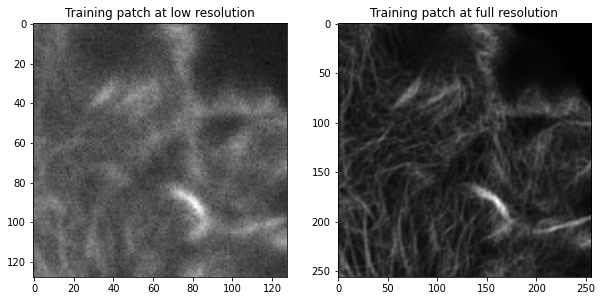

In [6]:
#@markdown ##Play this cell to prepare the model for training

train_patches_wf, train_patches_gt = create_random_patches( Training_source,
                                                            Training_target,
                                                            train_filenames,
                                                            down_factor, number_of_patches, 
                                                            [source_patch_size,source_patch_size]) 

# display patch

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow( train_patches_wf[0], 'gray' )
plt.title( 'Training patch at low resolution' )
# Side by side with its "ground truth"
plt.subplot(1, 2, 2)
plt.imshow( train_patches_gt[0], 'gray' )
plt.title( 'Training patch at full resolution' )
plt.savefig('/content/ExampleData.png', bbox_inches='tight', pad_inches=0)

# Prepare the training data and create data generators
# training input
input_shape = ( train_patches_wf[0].shape[0], train_patches_wf[0].shape[1], 1 ) # 128x128x1
X_train = [np.reshape(x, input_shape )/255 for x in train_patches_wf]
X_train = np.asarray(X_train)
print("Input patch shape: " + str(X_train[0].shape))

# training ground truth
output_shape = ( train_patches_gt[0].shape[0], train_patches_gt[0].shape[1] ,1 ) # 256x256x1
Y_train = [x/255 for x in train_patches_gt] # normalize between 0 and 1
#Y_train=train_patches_gt
Y_train = [np.reshape( x, output_shape ) for x in Y_train]
Y_train = np.asarray(Y_train)
print("Output patch shape: " + str(Y_train[0].shape))

# Calculate the number of steps to use for validation

validation_steps = np.ceil(len(X_train)*val_split/batch_size)
number_of_patches = X_train.shape[0]
number_of_steps=np.ceil(len(X_train)/batch_size)

# define data generators
train_generator, val_generator = get_train_val_generators( X_data=X_train,
                                                          Y_data=Y_train,
                                                          validation_split=val_split,
                                                          batch_size=batch_size,
                                                          show_examples=False,
                                                          rotation=Rotation,
                                                          horizontal_flip=horizontal_flip,
                                                          vertical_flip=vertical_flip)




# This modelcheckpoint will only save the best model from the validation loss point of view
model_checkpoint = ModelCheckpoint(os.path.join(full_model_path, 'weights_best.h5'), monitor='val_loss',verbose=1, 
                                   save_best_only=True, save_weights_only=True)



# --------------------- Using pretrained model ------------------------
#Here we ensure that the learning rate set correctly when using pre-trained models
if 'Use_pretrained_model' in locals():
  if Use_pretrained_model:
    if Weights_choice == "last":
      initial_learning_rate = lastLearningRate

    if Weights_choice == "best":            
      initial_learning_rate = bestLearningRate
  else:
    h5_file_path = None
else:
  Use_pretrained_model = False

patch_shape = train_patches_wf[0].shape
train_width = patch_shape[0] // down_factor
train_height = patch_shape[1] // down_factor

# DFCAN model
# DFCAN 16 (4, 4): 2.4M parameters
# DFCAN 32 (8, 4): 4.2M parameters
# DFCAN 50 (5, 10): M parameters

# ----------------------DEFINE THE MODEL----------------------------
model = DFCAN(input_shape, scale=down_factor, n_ResGroup = 4, n_RCAB = 4)


optim = tf.keras.optimizers.Adam( learning_rate=initial_learning_rate )
loss_funct = [loss_dfcan]
eval_metric = 'mean_squared_error'

# compile the model
model.compile(optimizer=optim, loss=loss_funct, metrics=[eval_metric])

if 'Use_pretrained_model' in locals():
  if Use_pretrained_model:
    	model.load_weights(h5_file_path)

# callback for early stop
earlystopper = EarlyStopping(patience=10, verbose=1, restore_best_weights=True)

# --------------------- Reduce learning rate on plateau ------------------------

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=(initial_learning_rate/10))
# --------------------- ---------------------- ------------------------


steps = np.ceil(len(X_train) / batch_size) * number_of_epochs
lr_schedule = OneCycleScheduler(initial_learning_rate, steps)


# ------------------ Failsafes ------------------

full_model_path = os.path.join(model_path, model_name)
if os.path.exists(full_model_path):
  print(R+'!! WARNING: Model folder already existed and has been removed !!'+W)
  shutil.rmtree(full_model_path)

os.makedirs(full_model_path)
os.makedirs(os.path.join(full_model_path,'Quality Control'))

# ------------------ Display ------------------
print('---------------------------- Main training parameters ----------------------------')
print('Number of epochs: '+str(number_of_epochs))
print('Batch size: '+str(batch_size))
print('Number of training images: '+str(number_of_patches))
print('Number of training steps: '+str(steps))
print('Number of validation steps: '+str(validation_steps))
print('---------------------------- ------------------------ ----------------------------')

##export to pdf
config_model= model.optimizer.get_config()
pdf_export(augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)


## **4.2. Train the network**
---
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches.

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

In [ ]:
import time
import csv

# Export the training parameters as pdf (before training, in case training fails) 
#pdf_export(augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

start = time.time()

#@markdown ##Start training


# Start Training
history = model.fit(train_generator, validation_data=val_generator,
                      validation_steps=validation_steps,
                      steps_per_epoch=np.ceil(len(X_train)/batch_size),
                      epochs=number_of_epochs, callbacks=[model_checkpoint,lr_schedule])

#model.save(os.path.join(full_model_path, 'last_model.h5'))
model.save_weights(os.path.join(full_model_path, 'weights_last.h5'))

#Note that the notebook should load weights either from the model that is 
#trained from scratch or if the pretrained weights are used (3.3.)

# convert the history.history dict to a pandas DataFrame:     
lossData = pd.DataFrame(history.history) 

# The training evaluation.csv is saved (overwrites the Files if needed). 
lossDataCSVpath = os.path.join(full_model_path,'Quality Control/training_evaluation.csv')
with open(lossDataCSVpath, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['loss','mean_squared_error','val_loss', 'val_mean_squared_error'])
  for i in range(len(history.history['loss'])):
    writer.writerow([history.history['loss'][i], history.history['mean_squared_error'][i] , history.history['val_loss'][i], history.history['val_mean_squared_error'][i]] )
    


# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

# PDF
# Export the training parameters as pdf (after training)
pdf_export(trained = True, augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

Epoch 1/10
94/94 [==============================] - 135s 950ms/step - loss: 0.1446 - mean_squared_error: 0.0705 - val_loss: 0.0801 - val_mean_squared_error: 0.0161

Epoch 00001: val_loss improved from inf to 0.08012, saving model to F-actin-small/models/dfcan_model/weights_best.h5
Epoch 2/10
94/94 [==============================] - 86s 913ms/step - loss: 0.0586 - mean_squared_error: 0.0170 - val_loss: 0.0132 - val_mean_squared_error: 0.0028

Epoch 00002: val_loss improved from 0.08012 to 0.01324, saving model to F-actin-small/models/dfcan_model/weights_best.h5
Epoch 3/10
94/94 [==============================] - 86s 911ms/step - loss: 0.0128 - mean_squared_error: 0.0026 - val_loss: 0.0100 - val_mean_squared_error: 0.0015

Epoch 00003: val_loss improved from 0.01324 to 0.01002, saving model to F-actin-small/models/dfcan_model/weights_best.h5
Epoch 4/10
94/94 [==============================] - 86s 912ms/step - loss: 0.0118 - mean_squared_error: 0.0021 - val_loss: 0.0098 - val_mean_squared

# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**



In [16]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = False #@param {type:"boolean"}

#@markdown ###If not, please provide the path to model folder and the scale between the low and high resolution images:

QC_model_folder = "F-actin-small/models/dfcan_model" #@param {type:"string"}
QC_down_factor = 2 #@param {type:"number"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)

if (Use_the_current_trained_model): 
  QC_model_name = model_name
  QC_model_path = model_path
else:
  down_factor=QC_down_factor

full_QC_model_path = QC_model_path+'/'+QC_model_name

#print(full_QC_model_path)

if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


The dfcan_model network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

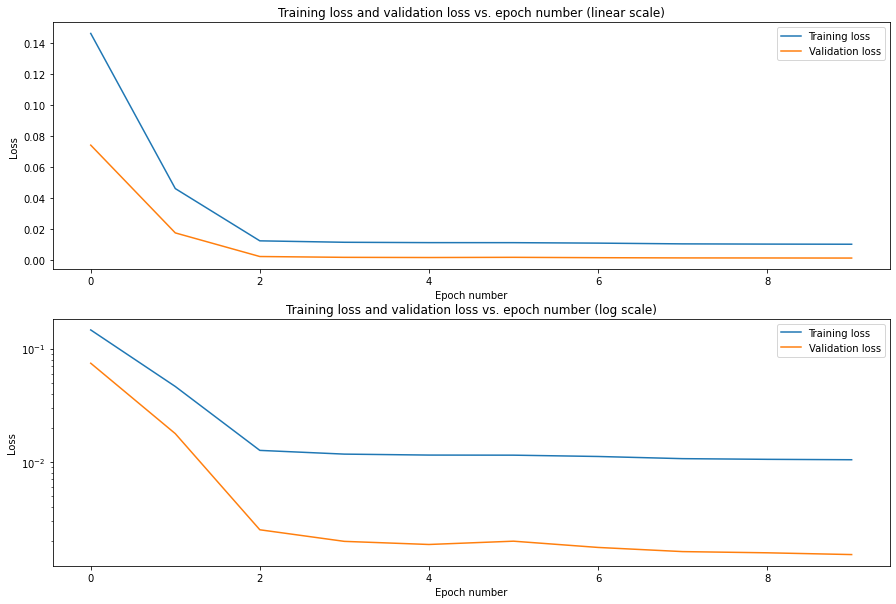

In [17]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number
import csv
from matplotlib import pyplot as plt

lossDataFromCSV = []
vallossDataFromCSV = []

csv_path = QC_model_path+'/'+QC_model_name+'/Quality Control/training_evaluation.csv'

if os.path.exists(csv_path):
  with open(QC_model_path+'/'+QC_model_name+'/Quality Control/training_evaluation.csv','r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

  epochNumber = range(len(lossDataFromCSV))
  plt.figure(figsize=(15,10))

  plt.subplot(2,1,1)
  plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
  plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
  plt.title('Training loss and validation loss vs. epoch number (linear scale)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch number')
  plt.legend()

  plt.subplot(2,1,2)
  plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
  plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
  plt.title('Training loss and validation loss vs. epoch number (log scale)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch number')
  plt.legend()
  plt.savefig(QC_model_path+'/'+QC_model_name+'/Quality Control/lossCurvePlots.png')
  plt.show()
else:
  print(R+'The path does not contain a csv file containing the loss and validation evolution of the model'+W)




## **5.2. Image predictions**
---


Available images : 120
Evaluating...
60/60 [==============================] - 105s 1s/step - loss: 0.0236 - mean_squared_error: 0.0056
Predicting...

# Generate predictions for 3 samples
predictions shape: (120, 1004, 1004, 1)


Text(0.5, 1.0, 'Prediction')

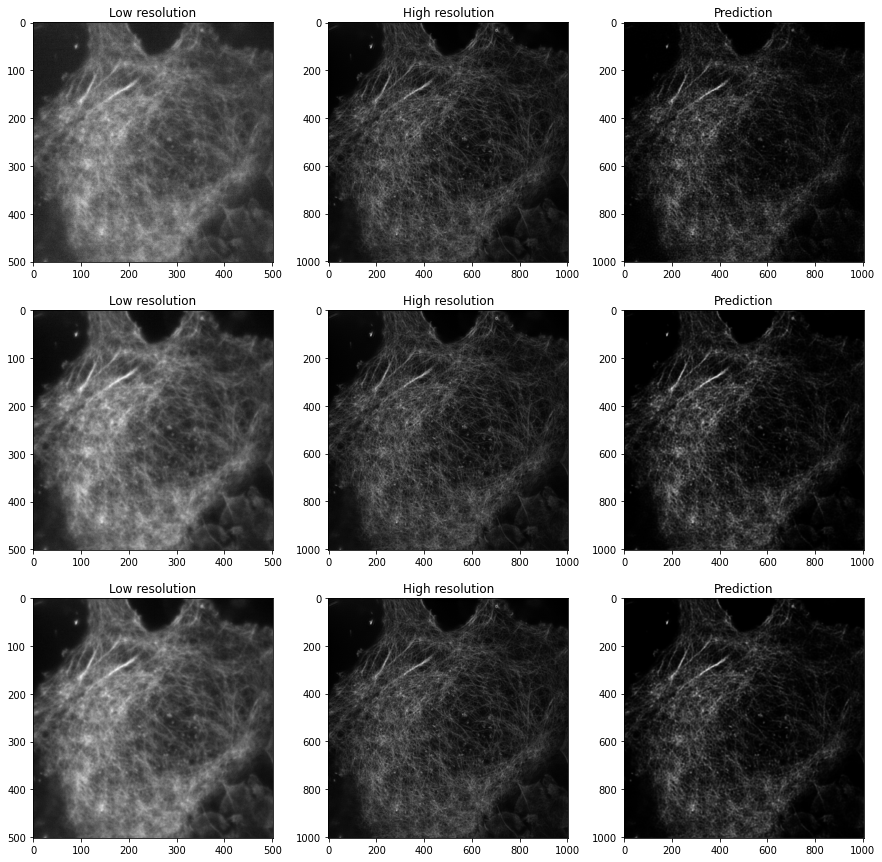

In [18]:
#@markdown ##Choose the folders that contain your Quality Control dataset

from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr

import keras
from keras.models import load_model


Source_QC_folder = "F-actin-small/Quality_control_dataset/LR_images" #@param{type:"string"}
Target_QC_folder = "F-actin-small/Quality_control_dataset/HR_images" #@param{type:"string"}


'''
# ------------- Initialise folders ------------
# Create a quality control/Prediction Folder
prediction_QC_folder = os.path.join(full_QC_model_path, 'Quality Control', 'Prediction')
if os.path.exists(prediction_QC_folder):
  shutil.rmtree(prediction_QC_folder)

os.makedirs(prediction_QC_folder)
'''

# Create a list of sources
source_dir_list = os.listdir(Source_QC_folder)
number_of_dataset = len(source_dir_list)


# Insert code to perform predictions on all datasets in the Source_QC folder

test_filenames = [x for x in os.listdir( Source_QC_folder ) if x.endswith(".tif")]
test_filenames.sort()

print( 'Available images : ' + str( len(test_filenames)) )


# Read test images
X_test = [ img_as_ubyte( io.imread( Source_QC_folder + '/' + x ) ) for x in test_filenames ]
Y_test = [ img_as_ubyte( io.imread( Target_QC_folder + '/' + x ) ) for x in test_filenames ]

X_test = [x/255 for x in X_test] # normalize between 0 and 1
X_test = np.expand_dims(X_test, axis=-1)

Y_test = [y/255 for y in Y_test] # normalize between 0 and 1
Y_test = np.expand_dims(Y_test, axis=-1)



input_shape = X_test.shape[1:]

optim = tf.keras.optimizers.Adam( learning_rate=0.0003 )
loss_funct = [loss_dfcan]
eval_metric = 'mean_squared_error'


model = DFCAN(input_shape, scale=down_factor,
              n_ResGroup = 4, n_RCAB = 4)

model.compile(optimizer=optim, loss=loss_funct, metrics=[eval_metric])

# Load weights
if (Use_the_current_trained_model): 
  model.load_weights( os.path.join(full_model_path, 'weights_best.h5') )
else:
  model.load_weights( os.path.join(full_QC_model_path, 'weights_best.h5') )


# Evaluate the model on the test data using evaluate
print( 'Evaluating...' )
results = model.evaluate(X_test, Y_test , batch_size=2)



print( 'Predicting...' )
predictions = model.predict(X_test,batch_size=8)

#Save the predictions
prediction_QC_folder = os.path.join(full_QC_model_path, 'Quality Control', 'Prediction')
if os.path.exists(prediction_QC_folder):
  shutil.rmtree(prediction_QC_folder)
os.makedirs(prediction_QC_folder)

i=0
for image in predictions:
  tf.keras.preprocessing.image.save_img(prediction_QC_folder+'/'+test_filenames[i], image, data_format=None, file_format=None)
  i=i+1

print('\n# Generate predictions for 3 samples')
#predictions = model.predict(X_test[:3])
print('predictions shape:', predictions.shape)

# Display corresponding first 3 images
plt.figure(figsize=(15,15))
plt.subplot(3, 3, 1)
plt.imshow( X_test[0,:,:,0], 'gray' )
plt.title( 'Low resolution' )
# Side by side with its "ground truth"
plt.subplot(3, 3, 2)
plt.imshow( Y_test[0,:,:,0], 'gray' )
plt.title( 'High resolution' )
# ant its prediction
plt.subplot(3, 3, 3)
plt.imshow( predictions[0,:,:,0], 'gray' )
plt.title( 'Prediction' )

plt.subplot(3, 3, 4)
plt.imshow( X_test[1,:,:,0], 'gray' )
plt.title( 'Low resolution' )
# Side by side with its "ground truth"
plt.subplot(3, 3, 5)
plt.imshow( Y_test[1,:,:,0], 'gray' )
plt.title( 'High resolution' )
# ant its prediction
plt.subplot(3, 3, 6)
plt.imshow( predictions[1,:,:,0], 'gray' )
plt.title( 'Prediction' )

plt.subplot(3, 3, 7)
plt.imshow( X_test[2,:,:,0], 'gray' )
plt.title( 'Low resolution' )
# Side by side with its "ground truth"
plt.subplot(3, 3, 8)
plt.imshow( Y_test[2,:,:,0], 'gray' )
plt.title( 'High resolution' )
# ant its prediction
plt.subplot(3, 3, 9)
plt.imshow( predictions[2,:,:,0], 'gray' )
plt.title( 'Prediction' )


## **5.3. Error mapping and quality metrics estimation**
---


<font size = 4>This section will calculate the SSIM, PNSR and MSSIM metrics between the predicted and target images to evaluate the quality of the results.

<font size = 4>**1. The SSIM (structural similarity) map** 

<font size = 4>The SSIM metric is used to evaluate whether two images contain the same structures. It is a normalized metric and an SSIM of 1 indicates a perfect similarity between two images. Therefore for SSIM, the closer to 1, the better.
<font size=4>**mSSIM** is the SSIM value calculated across the entire window of both images.

<font size = 4>**2. PSNR (Peak signal-to-noise ratio)** is a metric that gives the difference between the ground truth and prediction (or source input) in decibels, using the peak pixel values of the prediction and the MSE between the images. The higher the score the better the agreement.





In [ ]:
#@markdown ##Run to calculate the PSNR, SSIM and MSSIM metrics

#Now, we calculate the image metrics

from skimage import metrics

_MSSSIM_WEIGHTS = (0.0448, 0.2856, 0.3001, 0.2363, 0.1333)

psnr_array = []
for i in range(0, len(predictions)):
  pred = np.clip( predictions[i][:,:,0], a_min=0, a_max=1 )
  psnr_array.append(metrics.peak_signal_noise_ratio(pred, Y_test[i][:,:,0]))
psnr_mean = np.mean(psnr_array)

ssim_array = []
for i in range(0, len(predictions)):
  pred = np.clip( predictions[i][:,:,0], a_min=0, a_max=1 )
  ssim_array.append(metrics.structural_similarity(pred, Y_test[i][:,:,0]))
ssim_mean = np.mean(ssim_array)

mssim_array = []
for i in range(0, len(predictions)):
  pred = np.clip( predictions[i][:,:,:], a_min=0, a_max=1 )
  mssim_array.append(mssim(pred, Y_test[i][:,:,:].astype('float32'), max_val=1, power_factors=_MSSSIM_WEIGHTS, filter_size=11,
    filter_sigma=1.5, k1=0.01, k2=0.03 ))
mssim_mean = np.mean(mssim_array)

print("PSNR: ", psnr_mean)
print("SSIM: ", ssim_mean)
print("MSSIM:", mssim_mean)


PSNR:  23.38057986695252
SSIM:  0.5901511727127973
MSSIM: 0.8251795


Number of test images found in the folder: 120
Computing maps...


Text(0.5, 0, 'NRMSE: 0.171, PSNR: 28.106')

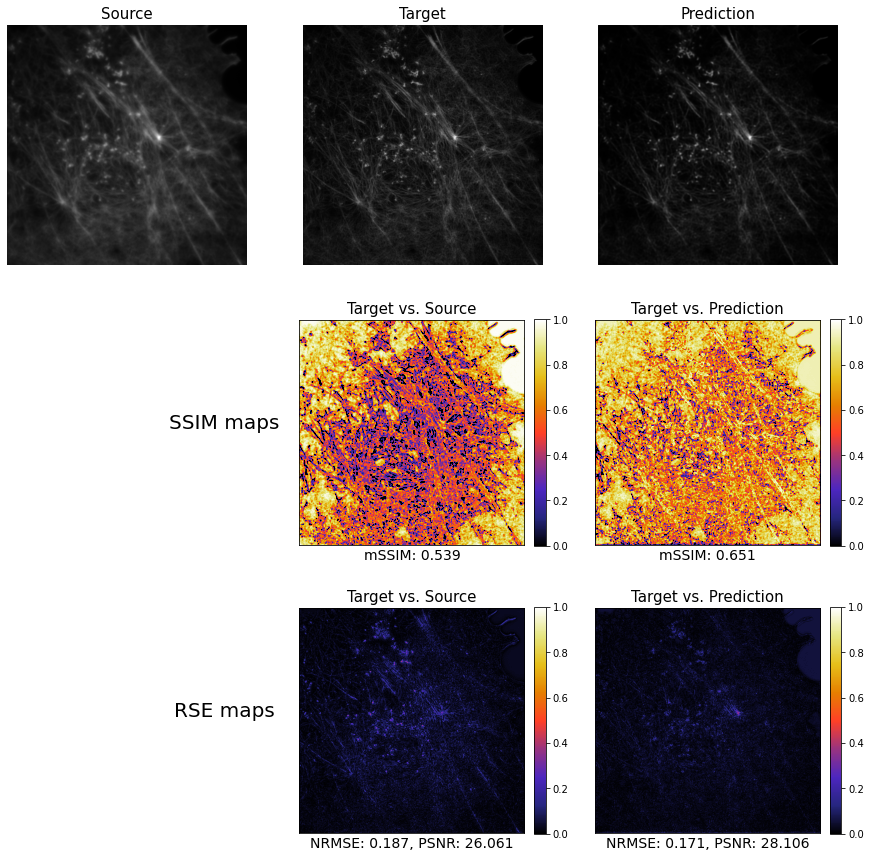

In [19]:
#@markdown ##SSIM and RSE map
#@markdown Now we will show the SSIM and RSE maps between the original images (upsampled using simple interpolation) and the target images, together with the maps between the predicted and target images.
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr

from glob import glob


# List Tif images in Source_QC_folder
Source_QC_folder_tif = Source_QC_folder+"/*.tif"
Z = sorted(glob(Source_QC_folder_tif))
Z = list(map(imread,Z))
print('Number of test images found in the folder: '+str(len(Z)))


def ssim(img1, img2):
  return structural_similarity(img1,img2,data_range=1.,full=True, gaussian_weights=True, use_sample_covariance=False, sigma=1.5)


def normalize(x, pmin=3, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """This function is adapted from Martin Weigert"""
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):#dtype=np.float32
    """This function is adapted from Martin Weigert"""
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x

def norm_minmse(gt, x, normalize_gt=True):
    """This function is adapted from Martin Weigert"""

    """
    normalizes and affinely scales an image pair such that the MSE is minimized  
     
    Parameters
    ----------
    gt: ndarray
        the ground truth image      
    x: ndarray
        the image that will be affinely scaled 
    normalize_gt: bool
        set to True of gt image should be normalized (default)
    Returns
    -------
    gt_scaled, x_scaled 
    """
    if normalize_gt:
        gt = normalize(gt, 0.1, 99.9, clip=False).astype(np.float32, copy = False)
    x = x.astype(np.float32, copy=False) - np.mean(x)
    #x = x - np.mean(x)
    gt = gt.astype(np.float32, copy=False) - np.mean(gt)
    #gt = gt - np.mean(gt)
    x_scaled = transform.resize( x, (gt.shape[0], gt.shape[1]), order=1 )
    scale = np.cov(x_scaled.flatten(), gt.flatten())[0, 1] / np.var(x_scaled.flatten())
    return gt, scale * x_scaled
    #return gt, x_scaled


# Open and create the csv file that will contain all the QC metrics
with open(QC_model_path+"/"+QC_model_name+"/Quality Control/QC_metrics_"+QC_model_name+".csv", "w", newline='') as file:
    writer = csv.writer(file)

    # Write the header in the csv file
    writer.writerow(["image #","Prediction v. GT mSSIM","Input v. GT mSSIM", "Prediction v. GT NRMSE", "Input v. GT NRMSE", "Prediction v. GT PSNR", "Input v. GT PSNR"])  

    # Let's loop through the provided dataset in the QC folders
    print('Computing maps...')

    for i in os.listdir(Source_QC_folder):
      if not os.path.isdir(os.path.join(Source_QC_folder,i)):
        #print('Running QC on: '+i)
      # -------------------------------- Target test data (Ground truth) --------------------------------
        test_GT = io.imread(os.path.join(Target_QC_folder, i))
        #test_GT = test_patches_gt

      # -------------------------------- Source test data --------------------------------
        test_source = io.imread(os.path.join(Source_QC_folder,i))
        #test_source = test_patches_wf

      # Normalize the images wrt each other by minimizing the MSE between GT and Source image
        test_GT_norm,test_source_norm = norm_minmse(test_GT, test_source, normalize_gt=True)

      # -------------------------------- Prediction --------------------------------
        test_prediction = io.imread(os.path.join(prediction_QC_folder,i))

      # Normalize the images wrt each other by minimizing the MSE between GT and prediction
        test_GT_norm,test_prediction_norm = norm_minmse(test_GT, test_prediction, normalize_gt=True)        

      # -------------------------------- Calculate the metric maps and save them --------------------------------

      # Calculate the SSIM maps
        index_SSIM_GTvsPrediction, img_SSIM_GTvsPrediction = ssim(test_GT_norm, test_prediction_norm)
        index_SSIM_GTvsSource, img_SSIM_GTvsSource = ssim(test_GT_norm, test_source_norm)

      #Save ssim_maps
        img_SSIM_GTvsPrediction_32bit = np.float32(img_SSIM_GTvsPrediction)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/SSIM_GTvsPrediction_'+i,img_SSIM_GTvsPrediction_32bit)
        img_SSIM_GTvsSource_32bit = np.float32(img_SSIM_GTvsSource)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/SSIM_GTvsSource_'+i,img_SSIM_GTvsSource_32bit)
      
      # Calculate the Root Squared Error (RSE) maps
        img_RSE_GTvsPrediction = np.sqrt(np.square(test_GT_norm - test_prediction_norm))
        img_RSE_GTvsSource = np.sqrt(np.square(test_GT_norm - test_source_norm))

      # Save SE maps
        img_RSE_GTvsPrediction_32bit = np.float32(img_RSE_GTvsPrediction)
        img_RSE_GTvsSource_32bit = np.float32(img_RSE_GTvsSource)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/RSE_GTvsPrediction_'+i,img_RSE_GTvsPrediction_32bit)
        io.imsave(QC_model_path+'/'+QC_model_name+'/Quality Control/RSE_GTvsSource_'+i,img_RSE_GTvsSource_32bit)


      # -------------------------------- Calculate the RSE metrics and save them --------------------------------

      # Normalised Root Mean Squared Error (here it's valid to take the mean of the image)
        NRMSE_GTvsPrediction = np.sqrt(np.mean(img_RSE_GTvsPrediction))
        NRMSE_GTvsSource = np.sqrt(np.mean(img_RSE_GTvsSource))
        
      # We can also measure the peak signal to noise ratio between the images
        PSNR_GTvsPrediction = psnr(test_GT_norm,test_prediction_norm,data_range=1.0)
        PSNR_GTvsSource = psnr(test_GT_norm,test_source_norm,data_range=1.0)

        writer.writerow([i,str(index_SSIM_GTvsPrediction),str(index_SSIM_GTvsSource),str(NRMSE_GTvsPrediction),str(NRMSE_GTvsSource),str(PSNR_GTvsPrediction),str(PSNR_GTvsSource)])


# All data is now processed saved
Test_FileList = os.listdir(prediction_QC_folder) # this assumes, as it should, that both source and target are named the same


plt.figure(figsize=(15,15))
# Currently only displays the last computed set, from memory


# Source
plt.subplot(3,3,1)
plt.axis('off')
img_Source = io.imread(os.path.join(Source_QC_folder, Test_FileList[-1]))
plt.imshow(img_Source,'gray')
plt.title('Source',fontsize=15)

# Target (Ground-truth)
plt.subplot(3,3,2)
plt.axis('off')
img_GT = io.imread(os.path.join(Target_QC_folder, Test_FileList[-1]))
plt.imshow(img_GT ,'gray')
plt.title('Target',fontsize=15)


#Prediction
plt.subplot(3,3,3)
plt.axis('off')
#img_Prediction = predictions
img_Prediction = io.imread(os.path.join(prediction_QC_folder, Test_FileList[-1]))
plt.imshow(img_Prediction,'gray')
plt.title('Prediction',fontsize=15)

#Setting up colours
cmap = plt.cm.CMRmap

#SSIM between GT and Source
plt.subplot(3,3,5)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)   
imSSIM_GTvsSource = plt.imshow(img_SSIM_GTvsSource, cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imSSIM_GTvsSource,fraction=0.046, pad=0.04)
plt.title('Target vs. Source',fontsize=15)
plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsSource,3)),fontsize=14)
plt.ylabel('SSIM maps',fontsize=20, rotation=0, labelpad=75)

#SSIM between GT and Prediction
plt.subplot(3,3,6)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False)  
imSSIM_GTvsPrediction = plt.imshow(img_SSIM_GTvsPrediction, cmap = cmap, vmin=0,vmax=1)
plt.colorbar(imSSIM_GTvsPrediction,fraction=0.046, pad=0.04)
plt.title('Target vs. Prediction',fontsize=15)
plt.xlabel('mSSIM: '+str(round(index_SSIM_GTvsPrediction,3)),fontsize=14)

#Root Squared Error between GT and Source
plt.subplot(3,3,8)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False) 
imRSE_GTvsSource = plt.imshow(img_RSE_GTvsSource, cmap = cmap, vmin=0, vmax = 1)
plt.colorbar(imRSE_GTvsSource,fraction=0.046,pad=0.04)
plt.title('Target vs. Source',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsSource,3))+', PSNR: '+str(round(PSNR_GTvsSource,3)),fontsize=14)
#plt.title('Target vs. Source PSNR: '+str(round(PSNR_GTvsSource,3)))
plt.ylabel('RSE maps',fontsize=20, rotation=0, labelpad=75)

#Root Squared Error between GT and Prediction
plt.subplot(3,3,9)
#plt.axis('off')
plt.tick_params(
    axis='both',      # changes apply to the x-axis and y-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,        # ticks along the top edge are off
    left=False,       # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelbottom=False,
    labelleft=False) 
imRSE_GTvsPrediction = plt.imshow(img_RSE_GTvsPrediction, cmap = cmap, vmin=0, vmax=1)
plt.colorbar(imRSE_GTvsPrediction,fraction=0.046,pad=0.04)
plt.title('Target vs. Prediction',fontsize=15)
plt.xlabel('NRMSE: '+str(round(NRMSE_GTvsPrediction,3))+', PSNR: '+str(round(PSNR_GTvsPrediction,3)),fontsize=14)


#Make a pdf summary of the QC results

#qc_pdf_export()

# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1. Generate prediction(s) from unseen dataset**
---
<font size = 4>The current trained model (from section 4.2) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

In [20]:
#@markdown ### Provide the path to your dataset and to the folder where the predictions are saved, then play the cell to predict outputs from your unseen images.

Data_folder = "F-actin-small/Quality_control_dataset/LR_images" #@param {type:"string"}
Result_folder = "F-actin-small/prediction_results" #@param {type:"string"}

# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, provide the name of the model and path to model folder:
#@markdown #####During training, the model files are automatically saved inside a folder named after model_name in section 3. Provide the path to this folder below.
Prediction_model_folder = "F-actin-small/models/dfcan_model" #@param {type:"string"}

if not os.path.exists(Result_folder):
  print("The "+Result_folder+ " path does not exist")


#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)

if (Use_the_current_trained_model): 
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path
else:
  initial_learning_rate=0.00

full_Prediction_model_path = os.path.join(Prediction_model_path, Prediction_model_name)
if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


# Read the list of file names
filenames = [x for x in os.listdir( Data_folder ) if x.endswith(".tif")]
filenames.sort()
print( 'Available images: ' + str( len(filenames)) )

# Read images
X = [ img_as_ubyte( io.imread( Data_folder + '/' + x ) ) for x in test_filenames ]
X = [x/255 for x in X] # normalize between 0 and 1
X = np.expand_dims(X, axis=-1)

# Create new model using new input shape (rest of parameters are the same)
input_shape = X.shape[1:]

model = DFCAN(input_shape, scale=down_factor,
              n_ResGroup = 4, n_RCAB = 4)

optim = tf.keras.optimizers.Adam( learning_rate=initial_learning_rate )
loss_funct = [loss_dfcan]
eval_metric = 'mean_squared_error'
model.compile(optimizer=optim, loss=loss_funct, metrics=[eval_metric])

# Load old weights
model.load_weights( os.path.join(full_Prediction_model_path, 'weights_best.h5') )
print("Predicting...")
predictions = model.predict(X_test,batch_size=8)

#Save the images
i=0
for image in predictions:
  tf.keras.preprocessing.image.save_img(Result_folder+'/'+filenames[i], image, data_format=None, file_format=None)
  i=i+1

print("Images saved into folder:", Result_folder)

Using current trained network
The dfcan_model network will be used.
Available images: 120
Predicting...
Images saved into folder: F-actin-small/prediction_results


## **6.2. Inspect the predicted output**
---



Text(0.5, 1.0, 'Prediction')

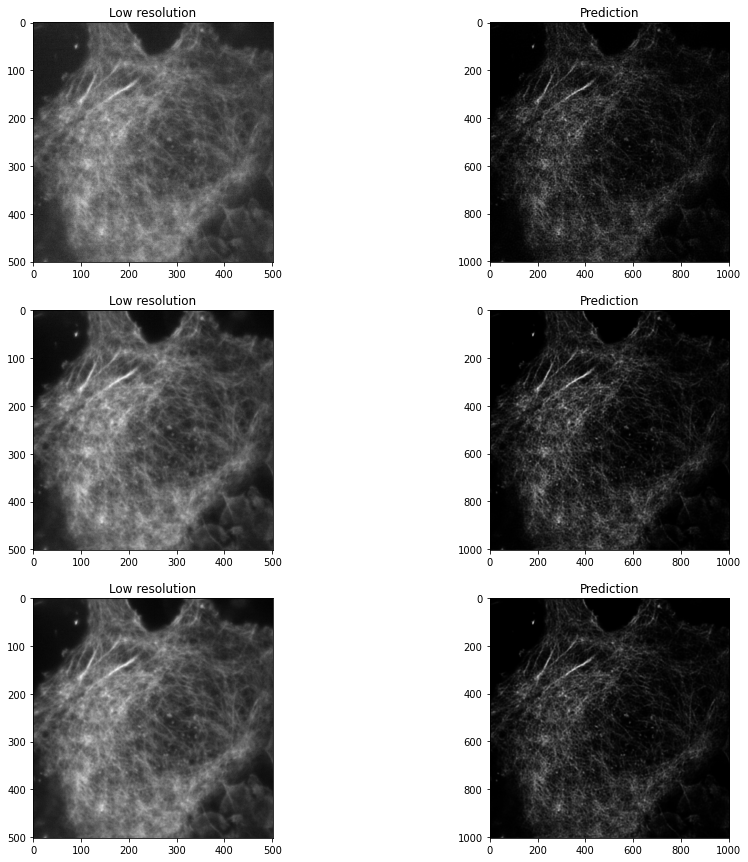

In [21]:
# @markdown  ##Run this cell to see some inputs with their corresponding outputs
##Run this cell to display a randomly chosen input and its corresponding predicted output.

'''
# This will display a randomly chosen dataset input and predicted output
random_choice = random.choice(os.listdir(Data_folder))
x = imread(Data_folder+"/"+random_choice)

os.chdir(Result_folder)
y = imread(Result_folder+"/"+random_choice)
'''


# Display corresponding first 3 patches
plt.figure(figsize=(15,15))
plt.subplot(3, 2, 1)
plt.imshow( X[0,:,:,0], 'gray' )
plt.title( 'Low resolution' )
# ant its prediction
plt.subplot(3, 2, 2)
plt.imshow( predictions[0,:,:,0], 'gray' )
plt.title( 'Prediction' )

plt.subplot(3, 2, 3)
plt.imshow( X[1,:,:,0], 'gray' )
plt.title( 'Low resolution' )
# ant its prediction
plt.subplot(3, 2, 4)
plt.imshow( predictions[1,:,:,0], 'gray' )
plt.title( 'Prediction' )

plt.subplot(3, 2, 5)
plt.imshow( X[2,:,:,0], 'gray' )
plt.title( 'Low resolution' )
# ant its prediction
plt.subplot(3, 2, 6)
plt.imshow( predictions[2,:,:,0], 'gray' )
plt.title( 'Prediction' )

## **6.3. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.


#**Thank you for using DFCAN!**